# Inisialisasi

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
# from sklearn.decomposition import PCA as sklearnPCA
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from scipy.stats import zscore

# from sklearn.decomposition import PCA as sklearnPCA
# from sklearn.preprocessing import StandardScaler

# from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
url = 'https://raw.githubusercontent.com/hasobi/skripsi/master/dataset/KDDTrain%2B_v1.csv'

In [0]:
df = pd.read_csv(url)

In [0]:
data = df

In [0]:
# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

data.replace(attack_dict, inplace = True)

# Define data (ambil Normal & DoS)

In [0]:
data_primary = data.loc[data['type_attack'].isin(['normal','dos'])]

In [9]:
data_primary.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


In [10]:
protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}

flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}

data_primary.replace(flag_dict, inplace = True)
data_primary.replace(service_dict, inplace = True)
data_primary.replace(protocol_dict, inplace = True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [11]:
data_primary.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,1,22,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


In [0]:
data_all = data_primary.drop(columns=['num_packet', 'type_attack'])

In [0]:
# data_all.drop(columns=['num_packet', 'type_attack'])

In [14]:
data_all.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00
1,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00
2,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01
3,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
4,0,1,22,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00


# PCA

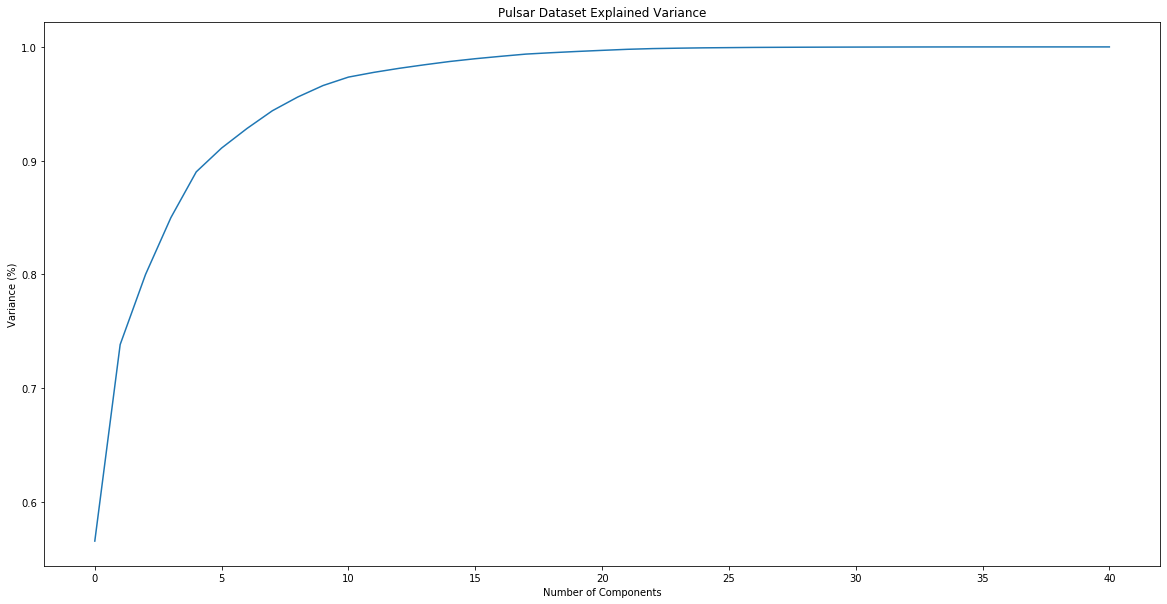

In [15]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data_all.iloc[:,:])

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
plt.figure(figsize=(20,10)) 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [16]:
pca = PCA(n_components=5)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4
0,0.188473,0.444017,0.647420,1.096441,0.016609
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235173
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176


In [17]:
df.shape

(113269, 5)

In [18]:
# PCA 10

pca = PCA(n_components=10)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.188473,0.444017,0.647420,1.096441,0.016608,0.109830,0.043725,-0.268808,-0.352866,0.717305
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046,0.086759,0.059994,-0.108642,-0.037668,0.019048
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235172,-0.093547,-0.120637,-0.124780,0.085580,0.030095
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711,-0.065730,0.048992,0.006543,-0.101855,-0.023447
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176,0.024948,0.052187,-0.109201,-0.002120,-0.004501


In [19]:
df.shape

(113269, 10)

In [20]:
# PCA 25

pca = PCA(n_components=25)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24
0,0.188473,0.444017,0.647420,1.096441,0.016608,0.109829,0.043725,-0.268810,-0.352869,0.717304,-0.228226,0.090865,-0.148836,-0.143329,0.048137,0.150255,0.056156,0.109531,-0.036056,0.157321,0.057765,0.098332,-0.007642,0.037965,0.004564
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046,0.086759,0.059994,-0.108643,-0.037668,0.019047,0.045946,-0.009891,-0.028268,-0.009508,0.023706,-0.004859,0.010683,-0.014633,-0.025800,0.045801,0.019274,0.021144,-0.000202,0.001778,-0.001125
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235172,-0.093547,-0.120637,-0.124779,0.085581,0.030095,-0.006218,0.093513,0.021702,0.040413,0.018772,0.086065,-0.101129,-0.025409,0.015466,0.014262,-0.034417,0.005172,0.001963,-0.011584,-0.062690
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711,-0.065730,0.048992,0.006543,-0.101855,-0.023447,-0.005122,-0.033677,-0.001548,0.015780,-0.013601,0.014743,0.002431,0.020913,0.006496,-0.004352,0.005187,0.002530,-0.001983,0.003487,0.005254
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176,0.024948,0.052187,-0.109202,-0.002120,-0.004501,0.008668,0.004576,-0.016279,-0.017508,0.011451,0.008284,-0.007846,-0.037247,-0.031509,0.058863,0.011057,0.008376,-0.002506,0.006438,0.012491


In [21]:
df.shape

(113269, 25)

In [22]:
# PCA 41

pca = PCA(n_components=41)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40
0,0.188473,0.444017,0.647420,1.096441,0.016608,0.109829,0.043725,-0.268810,-0.352869,0.717304,-0.228226,0.090865,-0.148836,-0.143329,0.048137,0.150255,0.056156,0.109531,-0.036056,0.157321,0.057765,0.098332,-0.007642,0.037965,0.004564,-0.047922,0.018537,-0.013010,0.000136,0.005116,0.013664,-0.001390,0.001989,-0.001017,0.001911,0.000013,-0.000492,-0.000350,-0.000197,-5.412495e-06,-8.504976e-18
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046,0.086759,0.059994,-0.108643,-0.037668,0.019047,0.045946,-0.009891,-0.028268,-0.009508,0.023706,-0.004859,0.010683,-0.014633,-0.025800,0.045801,0.019274,0.021144,-0.000202,0.001778,-0.001125,0.001751,0.000585,0.000334,-0.000500,-0.000102,-0.000410,0.000182,0.000088,0.000074,-0.000025,-0.000013,-0.000006,0.000082,0.000004,2.883116e-06,-1.775807e-17
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235172,-0.093547,-0.120637,-0.124779,0.085581,0.030095,-0.006218,0.093513,0.021702,0.040413,0.018772,0.086065,-0.101129,-0.025409,0.015466,0.014262,-0.034417,0.005172,0.001963,-0.011584,-0.062690,-0.004625,-0.012721,-0.000497,-0.001053,-0.000423,0.001127,0.000117,-0.000200,-0.000115,0.000689,-0.000071,0.000037,-0.000261,0.000065,1.239931e-06,-4.512433e-17
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711,-0.065730,0.048992,0.006543,-0.101855,-0.023447,-0.005122,-0.033677,-0.001548,0.015780,-0.013601,0.014743,0.002431,0.020913,0.006496,-0.004352,0.005187,0.002530,-0.001983,0.003487,0.005254,0.000758,-0.001913,0.000031,0.000164,-0.000838,-0.000659,-0.000083,0.000604,-0.000665,-0.000583,0.000113,-0.000051,0.000109,-0.000030,6.752815e-06,-6.182058e-17
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176,0.024948,0.052187,-0.109202,-0.002120,-0.004501,0.008668,0.004576,-0.016279,-0.017508,0.011451,0.008284,-0.007846,-0.037247,-0.031509,0.058863,0.011057,0.008376,-0.002506,0.006438,0.012491,-0.000561,0.005368,-0.000130,0.002123,0.000359,0.000140,-0.000285,-0.000126,-0.000100,0.000030,0.000005,-0.000033,-0.000096,-0.000014,2.253994e-07,3.882628e-18


# Score

In [0]:
pca = PCA(n_components=41)

In [24]:
pca.fit_transform(dataset)

array([[ 1.88473140e-01,  4.44016648e-01,  6.47420185e-01, ...,
        -1.97357460e-04, -5.41249540e-06, -1.14572850e-17],
       [ 1.70506774e+00, -2.78734032e-01, -8.85022533e-02, ...,
         4.47795924e-06,  2.88311551e-06, -2.35400374e-17],
       [-1.03754382e+00, -4.24768857e-01, -4.18468629e-01, ...,
         6.53585069e-05,  1.23993065e-06, -5.92751114e-17],
       ...,
       [-2.00891567e-01, -1.42562992e-01, -2.11111501e-01, ...,
        -6.46345059e-04,  1.04669588e-05,  3.01205507e-19],
       [ 1.72602544e+00, -2.63161471e-01, -3.28336145e-02, ...,
         1.68965419e-05, -2.28377087e-06, -2.89062405e-20],
       [-6.30582393e-01, -7.68932007e-02,  4.21121601e-02, ...,
         1.82927259e-06, -9.66252206e-06,  2.89082575e-19]])

In [0]:
# pca = PCA(svd_solver='auto', whiten=True)
# pca.fit(X)
# print(pca.components_)

In [0]:
feature_weights = pca.components_

In [27]:
feature_weights

array([[ 1.00000000e+00, -7.49272516e-17,  3.29624508e-17, ...,
        -2.08422797e-19, -2.71348628e-21, -1.62220310e-33],
       [ 7.49272516e-17,  1.00000000e+00, -8.77076189e-15, ...,
        -2.18265920e-19, -1.25518451e-20, -5.39260384e-33],
       [-3.29624508e-17,  8.65973959e-15,  1.00000000e+00, ...,
         1.86387707e-18, -3.40173335e-21, -6.16297582e-33],
       ...,
       [ 2.08422797e-19, -0.00000000e+00, -6.93889390e-18, ...,
         1.00000000e+00, -1.88217497e-16, -2.86056368e-16],
       [ 2.71348628e-21, -3.38813179e-21, -7.45388994e-20, ...,
         4.42354486e-16,  1.00000000e+00,  5.99333401e-13],
       [ 0.00000000e+00, -5.82243322e-33,  7.74381039e-33, ...,
         2.86056368e-16, -5.99333401e-13,  1.00000000e+00]])

In [0]:
df2=pd.DataFrame(data=feature_weights[0:,0:], index=[i for i in range(feature_weights.shape[0])], columns=['column '+str(i) for i in range(feature_weights.shape[1])])

In [29]:
df2.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40
0,1.000000e+00,-7.492725e-17,3.296245e-17,2.769954e-18,-4.132425e-17,-3.694426e-17,-2.544895e-18,-2.576057e-17,-2.091315e-17,-3.877935e-18,2.015141e-17,-5.713030e-18,-3.739438e-18,-4.154931e-19,5.609157e-18,-3.046949e-18,1.504431e-17,3.566316e-18,-2.441022e-18,1.107982e-18,1.869719e-18,-1.904343e-18,5.239108e-18,-2.250588e-19,-1.118802e-18,-2.250588e-19,7.790495e-20,1.514819e-18,-1.117990e-18,-3.678845e-20,5.626469e-19,-1.823192e-19,5.842871e-20,-3.624744e-19,2.407479e-19,-1.888155e-19,4.079190e-19,-3.352888e-19,-2.084228e-19,-2.713486e-21,-1.622203e-33
1,7.492725e-17,1.000000e+00,-8.770762e-15,-5.551115e-17,-9.367507e-17,-1.474515e-16,1.245477e-17,5.683591e-17,-1.169166e-16,-2.808059e-17,9.375513e-17,-5.285495e-18,-3.245679e-18,-1.098821e-17,4.086114e-17,-1.623694e-17,2.594566e-17,3.890018e-18,5.562496e-19,2.121518e-17,2.520749e-18,-8.125836e-18,-2.904792e-17,-4.075175e-19,6.367434e-19,2.678067e-18,1.913347e-18,1.077385e-17,1.111645e-18,1.233528e-18,3.541041e-18,2.279511e-19,-8.252516e-19,-1.502279e-18,2.407090e-19,-1.266698e-18,1.735062e-18,-1.611412e-18,-2.182659e-19,-1.255185e-20,-5.392604e-33
2,-3.296245e-17,8.659740e-15,1.000000e+00,-0.000000e+00,-1.110223e-16,1.110223e-16,8.326673e-17,-3.122502e-17,-2.185752e-16,-9.280771e-17,4.395085e-17,3.523826e-17,2.485687e-17,-1.812483e-17,2.711428e-17,2.906353e-17,1.993401e-16,3.786918e-17,-1.308998e-17,1.133913e-17,7.055669e-18,-2.742224e-17,1.855786e-17,-2.725803e-18,-1.100912e-17,-7.275700e-18,2.914265e-18,7.455600e-18,-1.553848e-17,2.012985e-18,7.469718e-18,-2.403390e-19,-6.492748e-19,-2.368122e-18,-4.406522e-19,-2.082632e-19,3.490648e-18,3.887367e-18,1.863877e-18,-3.401733e-21,-6.162976e-33
3,-2.769954e-18,-2.012279e-16,-2.324529e-16,1.000000e+00,9.777552e-15,-5.551115e-16,-1.110223e-16,0.000000e+00,1.110223e-16,-2.775558e-17,-8.326673e-17,-9.269929e-17,-6.413056e-17,-3.422775e-17,4.241179e-17,-1.300548e-17,7.853408e-17,9.598733e-18,-2.567193e-17,-7.338339e-19,5.923349e-19,9.191771e-18,2.574847e-17,3.349247e-18,1.571141e-17,-5.132803e-18,2.406367e-20,-5.440861e-17,-5.823725e-19,2.370883e-19,5.765871e-18,3.389137e-18,-4.154406e-19,1.133068e-17,-5.088828e-18,1.360832e-18,-6.568275e-18,-9.383408e-19,8.619770e-18,-1.501096e-20,1.848893e-32
4,4.132425e-17,-1.110223e-16,7.216450e-16,-9.270362e-15,1.000000e+00,0.000000e+00,1.110223e-16,8.673617e-16,5.134781e-16,2.324529e-16,-3.339343e-16,9.332270e-17,-1.981041e-17,1.152439e-16,1.100499e-16,6.171692e-17,-3.671762e-17,-1.056412e-16,-7.433379e-18,-1.182347e-17,-1.958653e-17,1.225528e-17,-1.333440e-16,6.281853e-18,2.149122e-17,1.333510e-17,-6.115099e-18,-2.124870e-17,1.851269e-17,2.334354e-18,-8.081866e-18,2.958375e-18,-3.313629e-18,7.969037e-18,-5.560112e-18,4.737888e-18,-1.888973e-17,6.852439e-18,8.957512e-18,8.302934e-20,4.314083e-32


In [30]:
feature_weights

array([[ 1.00000000e+00, -7.49272516e-17,  3.29624508e-17, ...,
        -2.08422797e-19, -2.71348628e-21, -1.62220310e-33],
       [ 7.49272516e-17,  1.00000000e+00, -8.77076189e-15, ...,
        -2.18265920e-19, -1.25518451e-20, -5.39260384e-33],
       [-3.29624508e-17,  8.65973959e-15,  1.00000000e+00, ...,
         1.86387707e-18, -3.40173335e-21, -6.16297582e-33],
       ...,
       [ 2.08422797e-19, -0.00000000e+00, -6.93889390e-18, ...,
         1.00000000e+00, -1.88217497e-16, -2.86056368e-16],
       [ 2.71348628e-21, -3.38813179e-21, -7.45388994e-20, ...,
         4.42354486e-16,  1.00000000e+00,  5.99333401e-13],
       [ 0.00000000e+00, -5.82243322e-33,  7.74381039e-33, ...,
         2.86056368e-16, -5.99333401e-13,  1.00000000e+00]])

In [0]:
# %matplotlib inline
# # fig, (ax1,ax2) = plt.subplots(1,2)
# ax1.bar(range(4),feature_weights[0],color=['b','g','r','c'])
# # ax2.bar(range(4),feature_weights[1],color=['b','g','r','c'])

# Importance

In [32]:
data_primary.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,1,22,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


In [0]:
data_primary1 = data_primary

In [34]:
attack_dict={
    "normal"  : 0,
    "dos"     : 1,
}

data_primary1.replace(attack_dict, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [35]:
data_primary1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0
1,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1
2,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0
3,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0
4,0,1,22,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1


In [43]:
'''
data = data_primary1  #pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

corr = data.corr()

plt.figure(figsize=(20,20))


ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
'''

"\ndata = data_primary1  #pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')\n\ncorr = data.corr()\n\nplt.figure(figsize=(20,20))\n\n\nax = sns.heatmap(\n    corr, \n    vmin=-1, vmax=1, center=0,\n    cmap=sns.diverging_palette(20, 220, n=200),\n    square=True\n)\nax.set_xticklabels(\n    ax.get_xticklabels(),\n    rotation=45,\n    horizontalalignment='right'\n);\n"

In [44]:
'''
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = data_primary1
columns = ['duration',	
'protocol_type',	
'service',	
'flag'	,
'src_bytes'	,
'dst_bytes'	,
'land'	,
'wrong_fragment',	
'urgent'	,
'hot'	,
'num_failed_logins'	,
'logged_in'	,
'num_compromised',	
'root_shell',	
'su_attempted',	
'num_root',	
'num_file_creations',	
'num_shells',	
'num_access_files',	
'num_outbound_cmds',
'is_host_login',	
'is_guest_login'	,
'count'	,
'srv_count'	,
'serror_rate'	,
'srv_serror_rate'	,
'rerror_rate'	,
'srv_rerror_rate',	
'same_srv_rate'	,
'diff_srv_rate'	,
'srv_diff_host_rate',	
'dst_host_count'	,
'dst_host_srv_count',	
'dst_host_same_srv_rate',	
'dst_host_diff_srv_rate',	
'dst_host_same_src_port_rate',	
'dst_host_srv_diff_host_rate',	
'dst_host_serror_rate',	
'dst_host_srv_serror_rate'	,
'dst_host_rerror_rate'	,
'dst_host_srv_rerror_rate',	
'num_packet'	,
'type_attack',] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)
'''

"\n# Step 1 - Make a scatter plot with square markers, set column names as labels\n\ndef heatmap(x, y, size):\n    fig, ax = plt.subplots()\n    \n    # Mapping from column names to integer coordinates\n    x_labels = [v for v in sorted(x.unique())]\n    y_labels = [v for v in sorted(y.unique())]\n    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} \n    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} \n    \n    size_scale = 500\n    ax.scatter(\n        x=x.map(x_to_num), # Use mapping for x\n        y=y.map(y_to_num), # Use mapping for y\n        s=size * size_scale, # Vector of square sizes, proportional to size parameter\n        marker='s' # Use square as scatterplot marker\n    )\n    \n    # Show column labels on the axes\n    ax.set_xticks([x_to_num[v] for v in x_labels])\n    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')\n    ax.set_yticks([y_to_num[v] for v in y_labels])\n    ax.set_yticklabels(y_labels)\n    \ndata = data_primary1\ncolumns =

In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

In [46]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0
1,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1
2,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0
3,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0
4,0,1,22,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1


In [47]:
plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

ValueError: ignored

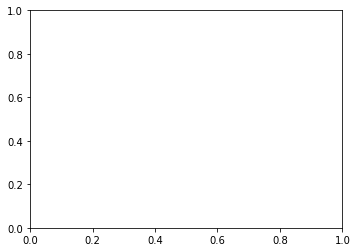

In [49]:
corrplot(data.corr())